# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2022/23)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 01.12.2022


### Zweiter Vorlesungsteil:  
#### Exponentielle und skalenfreie Netzwerke (exponentiell and scale-free networks)


## Einführung

Aufgrund ihrer unterschiedlichen Eigenschaften unterscheidet man die folgenden Netzwerk-Klassen: Zufällige Netzwerke (Random Networks: Die einzelnen Kanten bei zufälligen Netzwerke werden von den Knoten (Spielern) nach einem rein zufälligen Muster ausgewählt), Kleine Welt-Netzwerke (Small World Networks, Kleine Welt-Netzwerke zeichnen sich durch einen kleinen Wert der durchschnittlichen kürzesten Verbindung zwischen den Knoten des Netzwerkes und einem großen Wert des Clusterkoeffizienten aus), Exponentielle Netzwerke (Exponential Networks) und Skalenfreie Netzwerke (Scale-Free Networks). Bei einigen Modellnetzwerken können analytische Ergebnisse gewonnen werden. Im Folgenden betrachten wir die Klassen der exponentiellen und skalenfreien Netzwerke.

In exponentiellen und skalenfreien Netzwerken besitzen sehr viele Knoten wenig Kanten und einige wenige Knoten sehr viele Kanten. Wir betrachten zunächst die Klasse der exponentiellen Netzwerke.

## Exponentielle Netzwerke

Die Verteilungsfunktion der Knotengrade bei exponentielle Netzwerken ist nicht, wie bei zufälligen Netzwerken binomialverteilt, sondern folgt einem exponentiellen Verlauf. Im Folgenden wird die Konstruktion eines exponentiellen Netzwerks mittels eines zeitlichen Anwachsens der Netzwerkknoten betrachtet. Startet man z.B. zur Zeit t=0 mit zwei Knoten die durch eine ungerichtete Kante miteinander verbunden sind und fügt dem Netzwerk in jedem Zeitabschnitt $\Delta t =1$ einen weiteren Knoten hinzu und verbindet diesen in zufälliger Weise mit einem der Knoten des bestehenden Netzwerkes, so entwickelt sich im Laufe der Zeit ein exponentielles Netzwerk. Die Verteilungsfunktion der Knotengrade nähert sich für große Zeiten dem folgenden exponentiellen Verlauf an: $P(k)=2^{-k}$. Im Folgenden werden wir ein solches iteratives Erzeugen eines exponentiellen Netzwerks mittels NetworkX durchführen und den vorhergesagten analytischen Verlauf der Verteilungsfunktion der Knotengrade überprüfen.

Wir erzeugen am Anfang zunächst zwei Knoten, die mit einer Kante verbunden sind und stellen die iterative Erzeugung des exponentiellen Netzwerks in einer Animation dar.

Zunächst definieren wir die analytische Verteilungsfunktion:

In [1]:
def P(kmin,kmax):
    ergebnis=[]
    for k in range(kmin,kmax,1):
        ergebnis.append(2**(-k))
    return ergebnis

Wir importieren die nötigen Python-Module und setzen die Parameter des Bildes, in dem wir die Animation veranschaulichen werden: 

In [2]:
import networkx as nx
from random import randint
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.gridspec as gridspec
import math

In [5]:
params = {
    'figure.figsize'    : [13,4.5],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params)

Nun folgt die eigentliche Animation, wobei wir die Anordnung der Knoten mittels eines einfachen "shell_layout" visualisieren:

In [8]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,2], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

G=nx.Graph()
N=2
G.add_nodes_from([0,1])
G.add_edge(0,1)

def init():
    degree_sequence = []
    for i in G.nodes():
        degree_sequence.append(G.degree(i))
    maxk=max(degree_sequence)
    ax1.plot(range(0,int(maxk+2),1),np.array(P(0,int(maxk+2))), linewidth=1, linestyle='-', c="black")
    ax1.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
    ax2.plot(range(0,int(maxk+2),1),np.array(P(0,int(maxk+2))), linewidth=1, linestyle='-', c="black")
    ax2.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
    #pos=nx.fruchterman_reingold_layout(G,dim=2)
    pos=nx.shell_layout(G)
    node_x=[pos[k][0] for k in range(N)]
    node_y=[pos[k][1] for k in range(N)]
    edge_x = []
    edge_y = []
    for edge in G.edges():
        edge_x.append([pos[edge[0]][0],pos[edge[1]][0]])
        edge_y.append([pos[edge[0]][1],pos[edge[1]][1]])    
    ax3.scatter(node_x, node_y, s=20, marker='o', c="blue")
    for i in range(len(G.edges())):
        ax3.plot(edge_x[i], edge_y[i], linewidth=0.1, c="black", alpha=0.5)
    ax1.set_xlabel(r"$\rm k$")
    ax1.set_ylabel(r'$\rm P(k)$')
    ax2.set_xlabel(r"$\rm k$")
    ax2.set_ylabel(r'$\rm log(P(k))$')
    ax1.set_ylim(0,0.8)
    ax2.set_ylim(2**(-9),2**(-0.5))
    ax3.axis('off')
    ax2.set_yscale('log')
    return fig,

def animate(it):
    N = 2 + it
    G.add_node(N)
    G.add_edge(N,randint(0, N-1))
    ax1.cla()
    ax2.cla()
    ax3.cla()
    degree_sequence = []
    for i in G.nodes():
        degree_sequence.append(G.degree(i))
    maxk=max(degree_sequence)
    ax1.plot(range(0,int(maxk+2),1),np.array(P(0,int(maxk+2))), linewidth=1, linestyle='-', c="black")
    ax1.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
    ax2.plot(range(0,int(maxk+2),1),np.array(P(0,int(maxk+2))), linewidth=1, linestyle='-', c="black")
    ax2.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
    #pos=nx.fruchterman_reingold_layout(G,dim=2)
    pos=nx.shell_layout(G)
    node_x=[pos[k][0] for k in range(N+1)]
    node_y=[pos[k][1] for k in range(N+1)]
    edge_x = []
    edge_y = []
    for edge in G.edges():
        edge_x.append([pos[edge[0]][0],pos[edge[1]][0]])
        edge_y.append([pos[edge[0]][1],pos[edge[1]][1]])    
    ax3.scatter(node_x, node_y, s=20, marker='o', c="blue")
    for i in range(len(G.edges())):
        ax3.plot(edge_x[i], edge_y[i], linewidth=0.1, c="black", alpha=0.5)
    ax1.set_xlabel(r"$\rm k$")
    ax1.set_ylabel(r'$\rm P(k)$')
    ax2.set_xlabel(r"$\rm k$")
    ax2.set_ylabel(r'$\rm log(P(k))$')
    ax1.set_ylim(0,0.8)
    ax2.set_ylim(2**(-9),2**(-0.5))
    ax3.axis('off')
    ax2.set_yscale('log')
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=80,interval=200)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Man erkennt in der oberen Animation, dass sich die Verteilungsfunktion der Knotengrade immer mehr dem exponentiellen Verlauf $P(k)=2^{-k}$ annähert (siehe schwarze Kurve in der linken Abbildung), sodass man bei einer logarithmischen Darstellung log$_2(P(k))=-k$ einen linearen Verlauf erkennt (mittlere Abbildung). Die rechte Abbildung zeigt die Struktur des erzeugten exponentiellen Graphen.

Die Verlinkungswahrscheinlichkeit p und der durchschnittliche Knotengrad $\bar{k}$ des erzeugten Netzwerks haben die folgenden Werte:

In [5]:
N=len(G.nodes())
p=(2*G.number_of_edges()/(N*(N-1)))
print("Verlinkungswahrscheinlichkeit p:")
print(p)
sumki=0
for i in G.nodes():
    sumki=sumki+G.degree()[i]
avki=sumki/N
print("Durchschnittliche Knotengrad:")
print(avki)

Verlinkungswahrscheinlichkeit p:
0.024390243902439025
Durchschnittliche Knotengrad:
1.975609756097561


Die durchschnittliche kürzeste Verbindungsstrecke $l$ zwischen zwei Knoten, der Durchmesser des Netzwerks $d_{\rm max}$ und der globale Clusterkoeffizient $C$ betragen:

In [6]:
print("Durchschnittliche kürzeste Verbindungsstrecke zwischen zwei Knoten:")
print(nx.average_shortest_path_length(G))
print("Durchmesser des Netzwerks:")
print(nx.diameter(G))
print("Globaler Clusterkoeffizient:")
print(nx.average_clustering(G))

Durchschnittliche kürzeste Verbindungsstrecke zwischen zwei Knoten:
6.821138211382114
Durchmesser des Netzwerks:
14
Globaler Clusterkoeffizient:
0.0


Wir stellen das erzeugte exponentielle Netzwerk in einer dreidimensionalen Darstellung dar und benutzen nun das "fruchterman_reingold_layout" zur Positionierung der Knoten:

In [7]:
import plotly.graph_objects as go

In [8]:
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
pos3d=nx.fruchterman_reingold_layout(G,dim=3)
node_x=[pos3d[k][0] for k in range(N)]
node_y=[pos3d[k][1] for k in range(N)]
node_z=[pos3d[k][2] for k in range(N)]
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    edge_x+=[pos3d[edge[0]][0],pos3d[edge[1]][0], None]
    edge_y+=[pos3d[edge[0]][1],pos3d[edge[1]][1], None]
    edge_z+=[pos3d[edge[0]][2],pos3d[edge[1]][2], None]
labels=[]
group=[]
for node in G.nodes():
    labels.append('Knoten '+str(node)+', Knotengrad = '+str(degree_sequence[node]))
    group.append(degree_sequence[node])

edge_trace=go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='black', width=1.1),
    hoverinfo='none'
    )

node_trace=go.Scatter3d(
    x=node_x,
    y=node_y,
    z=node_z,
    mode='markers',
    marker=dict(
        symbol='circle',
        size=6,
        color=group,
        colorscale='YlGnBu',
        line=dict(color='black', width=0.8)
        ),
    text=labels,
    opacity=0.9,
    hoverinfo='text'
    )

axis=dict(
    showbackground=False,
    backgroundcolor="white",
    showline=False,
    zeroline=False,
    showgrid=True,
    gridcolor="rgb(244, 233, 245)",
    showticklabels=False,
    showaxeslabels=False,
    )

layout = go.Layout(
    width=700,
    height=700,
    showlegend=False,
    scene=dict(
        xaxis=dict(axis),
        yaxis=dict(axis),
        zaxis=dict(axis),
        ),
    margin=dict(b=20,l=10,r=10,t=10),
    hovermode='closest',
    )

data=[node_trace,edge_trace]
fig=go.Figure(data=data, layout=layout)
fig.show()

Man erkennt deutlich, dass es einige wenige Knoten mit vielen Verbindungen (hoher Knotengrad, dunkelblaue Knoten) gibt und eine große Anzahl von Knoten mit nur wenigen Verbindungen (niedriger Knotengrad, gelbe und grüne Knoten). Man erkennt außerdem, dass diejenigen Knoten mit großem Knotengrad im Mittel eher eine kleine Knotennummer haben, was bedeutet, dass sie schon zu einem frühen Zeitpunkt dem Netzwerk hinzugefügt wurden und somit effektiv mehr Zeit hatten Verbindungskanten aufzubauen. Diejenigen Knoten mit kleinem Knotengrad besitzen hingegen im Mittel eher eine hohe Knotennummer - sie wurden dem Netzwerk erst spät hinzugefügt und haben oft nur eine oder zwei Kanten. Diese hier erkennbaren Eigenschaften sind der eigentliche Grund für die entstehende exponentielle Verteilung der Knotengrade.

## Skalenfreie Netzwerke

Die Klasse der skalenfreien Netzwerke ist die wohl wichtigste aller Netzwerkklassen, da diese topologische Eigenschaft in vielen real existierenden Netzwerken realisiert ist (<A href="http://networksciencebook.com/chapter/4" target=blank>siehe Table 4.1: Albert-Laszlo Barabasi, Network Science</A>). Z.B. wird die Verteilungsfunktion der Knotengrade des Internets (WWW, Kanten zwischen Internetseiten, gerichtetes Netzwerk) mathematisch durch eine 'power-law distribution' beschrieben ($P(k)\sim k^{- \gamma}$). Die Bezeichnung <i>skalenfrei</i> gr&uuml;ndet hierbei auf der Eigenschaft, dass eine Umskalierung $k\rightarrow \alpha k$ mit einem beliebigen Faktor $\alpha$ wiederum zu einem Potenzgesetz f&uuml;hrt: $P(\alpha k) = \alpha^{- \gamma}k^{- \gamma} \sim k^{- \gamma}$. In skalenfreien Netzwerken kann man keine Aussage &uuml;ber den erwarteten Knotengrad machen, wenn man in zufalliger Weise einen Knoten aus dem Netzwerk ausw&auml;hlt; dieser kann extrem gro&szlig; oder sehr klein sein (<A href="http://networksciencebook.com/chapter/4" target=blank>Was bedeutet 'skalenfrei'? siehe Section 4.4: Albert-Laszlo Barabasi, Network Science</A>). Tr&auml;gt man ein solches Potenzgesetz $P(k) \sim k^{- \gamma}$ doppelt-logarithmisch auf (y-Achse ln(P), x-Achse ln(k)) so erh&auml;lt man eine Gerade (ln(P) =$-\gamma$ ln(k)). <br>

Eine ausführliche Darstellung der Eigenschaften dieser Netzwerke findet sich z.B. in <A href="http://networksciencebook.com/chapter/4" target=blank>Chapter 4: Albert-Laszlo Barabasi, Network Science</A> und im Folgenden werden einige wesentliche Eigenschaften kurz aufgelisted.
In skalenfreien Netzwerken entstehen sehr gro&szlig;e Hubs (Hauptunterschied zu zuf&auml;lligen Netzwerken,
<A href="http://networksciencebook.com/chapter/4" target=blank>siehe Image 4.4 und 4.5: Albert-Laszlo Barabasi, Network Science</A>. Viele real existierende komplexe Netzwerke zeigen ein skalenfreies Verhalten, wobei der Exponent $\gamma$ meistens im folgenden Wertebereich zu finden ist:  $2 < \gamma < 3$. Skalenfreie Netzwerke mit $\gamma < 3$ besitzen keine sinnvolle interne Knotengradskala. Greift man zuf&auml;llig einen Knoten aus dem Netzwerk, so kann man seinen Knotengrad nicht vorher einschr&auml;nken; er kann sehr klein oder extrem gro&szlig; sein. Die Standardabweichung der Knotengrade divergiert sogar f&uuml;r $N \rightarrow \infty$ (<A href="http://networksciencebook.com/chapter/4" target=blank>siehe Tabelle 4.1, Image 4.7 und 4.8: Albert-Laszlo Barabasi, Network Science</A>). Man beobachtet die skalenfreie Eigenschaft in vielen unterschiedlichen real existierenden komplexen Netzwerken (<A href="http://networksciencebook.com/chapter/4" target=blank>siehe Universality, Section 4.5, Box 4.2: Albert-Laszlo Barabasi, Network Science</A>). Es kann zu ultra small world Eigenschaften in skalenfreien Netzwerken kommen; dies ist abh&auml;ngig vom Exponenten $\gamma$ (<A href="http://networksciencebook.com/chapter/4" target=blank>siehe Section 4.6: Albert-Laszlo Barabasi, Network Science</A>). Die Gr&ouml;&szlig;e des Exponenten $\gamma$ hat starke Auswirkungen auf die Netzwerkeigenschaften (<A href="http://networksciencebook.com/chapter/4" target=blank>siehe Box 4.5: Albert-Laszlo Barabasi, Network Science</A>). Man kann z.B. zeigen, dass skalenfreie Netzwerke mit $\gamma<2$ nicht existieren k&ouml;nnen (<A href="http://networksciencebook.com/chapter/4" target=blank>siehe Box 4.6: Albert-Laszlo Barabasi, Network Science</A>). 

Das Barabasi-Albert (BA) Model der skalenfreien Netzwerke stellt eine mathematische Modelierung eines skalenfreien Netzwerkes dar (<A href="http://networksciencebook.com/chapter/5" target=blank>siehe Chapter 5: Albert-Laszlo Barabasi, Network Science</A>). Im BA-Model werden die folgenden Prinzipien bei der Konstruktion des skalenfreien Netzwerkes benutzt: a) Zeitliches Anwachsen der Knoten und Kanten und b) Preferential Attachment (<A href="http://networksciencebook.com/chapter/5" target=blank>siehe Section 5.2 und Image 5.2: Albert-Laszlo Barabasi, Network Science</A>). Die mathematische Definition der Konstruktion eines skalenfreien Netzwerkes mittels des Barabasi-Albert Models wird in folgendem link beschrieben: (<A href="http://networksciencebook.com/chapter/5" target=blank>Box 5.1: Albert-Laszlo Barabasi, Network Science</A>). Die Konstruktion eines skalenfreien Netzwerkes &auml;hnelt der eines exponentiellen Netzwerkes, wobei bei skalenfreien Netzen der zus&auml;tzliche Effekt einer erh&ouml;hten Verlinkungswahrscheinlichkeit (Preferential Attachment) ein bevorzugtes Anlagern der Netzwerkkanten an attraktivere Knoten bewirkt. Ein Vergleich der Eigenschaften von exponentiellen Netzwerken mit skalenfreien Netzwerken findet sich in der <A href="http://networksciencebook.com/chapter/5" target=blank>Section 5.6: Albert-Laszlo Barabasi, Network Science</A>. Eine Zusammenfassung der mathematischen Eigenschaften von skalenfreie Netzwerken ist in 
<A href="http://networksciencebook.com/chapter/5" target=blank>Box 5.4: Albert-Laszlo Barabasi, Network Science</A> zu finden.

Im Folgenden wollen wir uns die Eigenschaften eines skalenfreien Netzwerkes an einem Beispiel betrachten. In NetworkX kann man ein skalenfreies Netzwerke mittels eines vordefinierten Graphengenerators erzeugen. Die Funktion "nx.barabasi_albert_graph(N,K)" erzeugt einen skalenfreien Barabasi_Albert Graphen mit N-Knoten, wobei in einem iterativen Prozess jeder neu in das Netzwerk eingebundene Knoten mit K Kanten zu dem bereits existierenden Netzwerk verbunden wurde. Diese neuen K-Verbindungen werden jedoch nicht zufällig gemacht, sondern die Wahrscheinlichkeit der neuen Verbindungen folgt dem Prinzip des <i>preferential attachment</i>.

Für N=250 und K=1 erhält man:

In [9]:
N=250
K=1
G=nx.barabasi_albert_graph(N,K)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
pos3d=nx.fruchterman_reingold_layout(G,dim=3)
#pos3d=nx.kamada_kawai_layout(G,dim=3)
node_x=[pos3d[k][0] for k in range(N)]
node_y=[pos3d[k][1] for k in range(N)]
node_z=[pos3d[k][2] for k in range(N)]
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    edge_x+=[pos3d[edge[0]][0],pos3d[edge[1]][0], None]
    edge_y+=[pos3d[edge[0]][1],pos3d[edge[1]][1], None]
    edge_z+=[pos3d[edge[0]][2],pos3d[edge[1]][2], None]
labels=[]
group=[]
for node in G.nodes():
    labels.append('Knoten '+str(node)+', Knotengrad = '+str(degree_sequence[node]))
    group.append(degree_sequence[node])

edge_trace=go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='black', width=1.1),
    hoverinfo='none'
    )

node_trace=go.Scatter3d(
    x=node_x,
    y=node_y,
    z=node_z,
    mode='markers',
    marker=dict(
        symbol='circle',
        size=6,
        color=group,
        colorscale='YlGnBu',
        line=dict(color='black', width=0.8)
        ),
    text=labels,
    opacity=0.9,
    hoverinfo='text'
    )

axis=dict(
    showbackground=False,
    backgroundcolor="white",
    showline=False,
    zeroline=False,
    showgrid=True,
    gridcolor="rgb(244, 233, 245)",
    showticklabels=False,
    showaxeslabels=False,
    )

layout = go.Layout(
    width=700,
    height=700,
    showlegend=False,
    scene=dict(
        xaxis=dict(axis),
        yaxis=dict(axis),
        zaxis=dict(axis),
        ),
    margin=dict(b=20,l=10,r=10,t=10),
    hovermode='closest',
    )

data=[node_trace,edge_trace]
fig=go.Figure(data=data, layout=layout)
fig.show()

Die obere Abbildung stellt eine spezielle Konfiguration des skalenfreien Barabasi-Albert Graphen mit N=250 und K=1 dar. Erzeugt man mit "G=nx.barabasi_albert_graph(N,K)" erneut einen solchen Graphen, ist die spezielle Konfiguration stets unterschiedlich (siehe folgende, untere Abbildung).

In [10]:
N=250
K=1
G=nx.barabasi_albert_graph(N,K)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
pos3d=nx.fruchterman_reingold_layout(G,dim=3)
#pos3d=nx.kamada_kawai_layout(G,dim=3)
node_x=[pos3d[k][0] for k in range(N)]
node_y=[pos3d[k][1] for k in range(N)]
node_z=[pos3d[k][2] for k in range(N)]
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    edge_x+=[pos3d[edge[0]][0],pos3d[edge[1]][0], None]
    edge_y+=[pos3d[edge[0]][1],pos3d[edge[1]][1], None]
    edge_z+=[pos3d[edge[0]][2],pos3d[edge[1]][2], None]
labels=[]
group=[]
for node in G.nodes():
    labels.append('Knoten '+str(node)+', Knotengrad = '+str(degree_sequence[node]))
    group.append(degree_sequence[node])

edge_trace=go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='black', width=1.1),
    hoverinfo='none'
    )

node_trace=go.Scatter3d(
    x=node_x,
    y=node_y,
    z=node_z,
    mode='markers',
    marker=dict(
        symbol='circle',
        size=6,
        color=group,
        colorscale='YlGnBu',
        line=dict(color='black', width=0.8)
        ),
    text=labels,
    opacity=0.9,
    hoverinfo='text'
    )

axis=dict(
    showbackground=False,
    backgroundcolor="white",
    showline=False,
    zeroline=False,
    showgrid=True,
    gridcolor="rgb(244, 233, 245)",
    showticklabels=False,
    showaxeslabels=False,
    )

layout = go.Layout(
    width=700,
    height=700,
    showlegend=False,
    scene=dict(
        xaxis=dict(axis),
        yaxis=dict(axis),
        zaxis=dict(axis),
        ),
    margin=dict(b=20,l=10,r=10,t=10),
    hovermode='closest',
    )

data=[node_trace,edge_trace]
fig=go.Figure(data=data, layout=layout)
fig.show()

Für N=250 und K=2 erhält man:

In [11]:
N=250
K=2
G=nx.barabasi_albert_graph(N,K)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
pos3d=nx.fruchterman_reingold_layout(G,dim=3)
#pos3d=nx.kamada_kawai_layout(G,dim=3)
node_x=[pos3d[k][0] for k in range(N)]
node_y=[pos3d[k][1] for k in range(N)]
node_z=[pos3d[k][2] for k in range(N)]
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    edge_x+=[pos3d[edge[0]][0],pos3d[edge[1]][0], None]
    edge_y+=[pos3d[edge[0]][1],pos3d[edge[1]][1], None]
    edge_z+=[pos3d[edge[0]][2],pos3d[edge[1]][2], None]
labels=[]
group=[]
for node in G.nodes():
    labels.append('Knoten '+str(node)+', Knotengrad = '+str(degree_sequence[node]))
    group.append(degree_sequence[node])

edge_trace=go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='black', width=1.1),
    hoverinfo='none'
    )

node_trace=go.Scatter3d(
    x=node_x,
    y=node_y,
    z=node_z,
    mode='markers',
    marker=dict(
        symbol='circle',
        size=6,
        color=group,
        colorscale='YlGnBu',
        line=dict(color='black', width=0.8)
        ),
    text=labels,
    opacity=0.9,
    hoverinfo='text'
    )

axis=dict(
    showbackground=False,
    backgroundcolor="white",
    showline=False,
    zeroline=False,
    showgrid=True,
    gridcolor="rgb(244, 233, 245)",
    showticklabels=False,
    showaxeslabels=False,
    )

layout = go.Layout(
    width=700,
    height=700,
    showlegend=False,
    scene=dict(
        xaxis=dict(axis),
        yaxis=dict(axis),
        zaxis=dict(axis),
        ),
    margin=dict(b=20,l=10,r=10,t=10),
    hovermode='closest',
    )

data=[node_trace,edge_trace]
fig=go.Figure(data=data, layout=layout)
fig.show()

Im Folgenden werden wir die Verteilungsfunktion der Knotengrade für drei unterschiedlich große skalenfreie Netzwerke darstellen:

In [12]:
params = {
    'figure.figsize'    : [14,11],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [13]:
def Pscfree(kmin,kmax,gamma):
    ergebnis=[]
    for k in range(kmin+1,kmax,1):
        ergebnis.append(k**(-gamma))
    return ergebnis

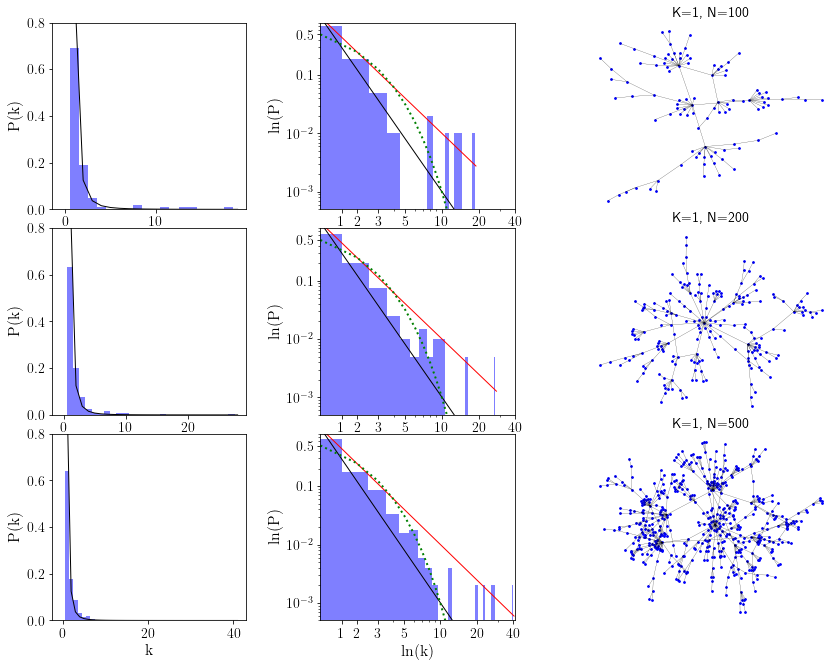

In [14]:
N = [100,200,500]
K=1
fig = plt.figure()
gs = gridspec.GridSpec(3, 3, width_ratios=[0.8,0.8,1], wspace=0.35, hspace=0.1)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
ax6 = plt.subplot(gs[5])
ax7 = plt.subplot(gs[6])
ax8 = plt.subplot(gs[7])
ax9 = plt.subplot(gs[8])

ax1.set_xlabel(r"$\rm k$")
ax1.set_ylabel(r'$\rm P(k)$')
ax2.set_xlabel(r"$\rm ln(k)$")
ax2.set_ylabel(r'$\rm ln(P)$')
ax3.axis('off')
ax4.set_xlabel(r"$\rm k$")
ax4.set_ylabel(r'$\rm P(k)$')
ax5.set_xlabel(r"$\rm ln(k)$")
ax5.set_ylabel(r'$\rm ln(P)$')
ax6.axis('off')
ax7.set_xlabel(r"$\rm k$")
ax7.set_ylabel(r'$\rm P(k)$')
ax8.set_xlabel(r"$\rm ln(k)$")
ax8.set_ylabel(r'$\rm ln(P)$')
ax9.axis('off')
ax1.set_ylim(0,0.8)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax4.set_ylim(0,0.8)
ax5.set_xscale('log')
ax5.set_yscale('log')
ax7.set_ylim(0,0.8)
ax8.set_xscale('log')
ax8.set_yscale('log')

G=nx.barabasi_albert_graph(N[0],K)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
ax1.plot(range(1,int(maxk+2),1),np.array(Pscfree(0,int(maxk+2),3)), linewidth=1, linestyle='-', c="black")
ax1.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
ax2.plot(range(1,int(maxk+2),1),np.array(Pscfree(0,int(maxk+2),3)), linewidth=1, linestyle='-', c="black")
ax2.plot(range(1,int(maxk+2),1),np.array(Pscfree(0,int(maxk+2),2)), linewidth=1, linestyle='-', c="red")
ax2.plot(range(1,int(maxk+2),1),np.array(P(1,int(maxk+2))), linewidth=2, linestyle=':', c="green")
ax2.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
ax2.axis([1,int(maxk+2),0.0005,0.8])
ax2.xaxis.set_ticks([1.5,2,3,5,10,20,40])
ax2.set_xticklabels(["$1$","$2$","$3$","$5$","$10$","$20$","$40$"])
ax2.yaxis.set_ticks([0.001,0.01,0.1,0.5])
ax2.set_yticklabels(["$10^{-3}$","$10^{-2}$","$0.1$","$0.5$"])

pos2d=nx.fruchterman_reingold_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N[0])]
node_y=[pos2d[k][1] for k in range(N[0])]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax3.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax3.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='K=1, N='+str(N[0])
ax3.set_title(titelstr)


G=nx.barabasi_albert_graph(N[1],K)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
ax4.plot(range(1,int(maxk+2),1),np.array(Pscfree(0,int(maxk+2),3)), linewidth=1, linestyle='-', c="black")
ax4.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
ax5.plot(range(1,int(maxk+2),1),np.array(Pscfree(0,int(maxk+2),3)), linewidth=1, linestyle='-', c="black")
ax5.plot(range(1,int(maxk+2),1),np.array(Pscfree(0,int(maxk+2),2)), linewidth=1, linestyle='-', c="red")
ax5.plot(range(1,int(maxk+2),1),np.array(P(1,int(maxk+2))), linewidth=2, linestyle=':', c="green")
ax5.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
ax5.axis([1,int(maxk+2),0.0005,0.8])
ax5.xaxis.set_ticks([1.5,2,3,5,10,20,40])
ax5.set_xticklabels(["$1$","$2$","$3$","$5$","$10$","$20$","$40$"])
ax5.yaxis.set_ticks([0.001,0.01,0.1,0.5])
ax5.set_yticklabels(["$10^{-3}$","$10^{-2}$","$0.1$","$0.5$"])


pos2d=nx.fruchterman_reingold_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N[1])]
node_y=[pos2d[k][1] for k in range(N[1])]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax6.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax6.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='K=1, N='+str(N[1])
ax6.set_title(titelstr)

G=nx.barabasi_albert_graph(N[2],K)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
ax7.plot(range(1,int(maxk+2),1),np.array(Pscfree(0,int(maxk+2),3)), linewidth=1, linestyle='-', c="black")
ax7.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
ax8.plot(range(1,int(maxk+2),1),np.array(Pscfree(0,int(maxk+2),3)), linewidth=1, linestyle='-', c="black")
ax8.plot(range(1,int(maxk+2),1),np.array(Pscfree(0,int(maxk+2),2)), linewidth=1, linestyle='-', c="red")
ax8.plot(range(1,int(maxk+2),1),np.array(P(1,int(maxk+2))), linewidth=2, linestyle=':', c="green")
ax8.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.5)
ax8.axis([1,int(maxk+2),0.0005,0.8])
ax8.xaxis.set_ticks([1.5,2,3,5,10,20,40])
ax8.set_xticklabels(["$1$","$2$","$3$","$5$","$10$","$20$","$40$"])
ax8.yaxis.set_ticks([0.001,0.01,0.1,0.5])
ax8.set_yticklabels(["$10^{-3}$","$10^{-2}$","$0.1$","$0.5$"])

pos2d=nx.fruchterman_reingold_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N[2])]
node_y=[pos2d[k][1] for k in range(N[2])]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax9.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax9.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='K=1, N='+str(N[2])
ax9.set_title(titelstr);

Die obigen Abbildungen zeigen die Verteilungsfunktion der Knotengrade in linearer (links) und doppelt-logarithmischer Darstellung (mittlere Abbildungen) für drei skalenfreie Netzwerke (N=100,200,500). Die rechten Abbildungen zeigen wieder die zweidimensionale Struktur der skalenfreien Graphen im Fruchterman-Reingold Layout. In den mittleren Abbildungen sind zusätzlich noch die analytischen Verteilungsfunktionen für skalenfreie Netzwerke (schwarze Kurve $P(k) = k^{-3}$, rote Kurve $P(k) = k^{-2}$) und zum Vergleich für exponentielle Netzwerke (gepunktete grüne Kurve $P(k) = 2^{-k}$) dargestellt. In der benutzten doppelt-logarithmischer Darstellung erscheinen die analytischen Verteilungsfunktionen der skalenfreien Netzwerke als Geraden. Man erkennt, dass sich die erzeugten Netzwerke in einem großen Bereich gut durch die schwarze Verteilung $P(k) = k^{-3}$ beschreiben lassen; lediglich bei sehr großen k-Werten ergeben sich Abweichungen. Diese großen Knotengrade, die bei sehr wenigen Knoten auftreten können, bezeichnet man als das "long tail"-Verhalten - sie stellen die sogenannten Hubs des skalenfreien Netzwerkes dar (einige wenige Knoten mit extrem vielen Kanten).

Im Folgenden werden wir noch einige analytisch berechenbare Eigenschaften von skalenfreien Netzwerken nummerisch überprüfen:

#### Knotengrad des größten Hubs
Der Knotengrad des Knotens mit der höchsten Anzahl von Kanten ($k_{\rm max}$, größter Hub) stellt einen natürlichen "cut off" bei der Verteilung der Knotengrade dar (siehe <A href="http://networksciencebook.com/chapter/4#hubs" target=blank> Section 4.3, Hubs: Albert-Laszlo Barabasi, Network Science</A>). Man kann zeigen, dass für skalenfreie Netzwerke die folgende Relation gilt: $k_{\rm max}=k_{\rm min}\,N^{\frac{1}{\gamma-1}}$, wobei $k_{\rm min}$ der kleinste Knotengrad im Netzwerk ist, $N$ die gesamte Knotenzahl und $\gamma$ der Exponent der Verteilungsfunktion ist.

#### Durchschnittliche kürzeste Verbindungsstrecke $l=<d_{ij}>$ zwischen zwei Knoten
Die durchschnittlich kürzeste Verbindungsstrecke $l=<d_{ij}>$ zwischen zwei Knoten in einem skalenfreien Netzwerk hängt von der Größe des Netzwerkes (Anzahl der Knoten $N$) und dem Exponenten $\gamma$ der Verteilungsfunktion ab (siehe <A href="http://networksciencebook.com/chapter/4#ultra-small" target=blank> Section 4.6: Albert-Laszlo Barabasi, Network Science</A>). Es gilt:
$
l  \sim \left\{ \begin{array}{l}
 const.\hspace{10 mm}\forall\hspace{3 mm}\gamma  = 2 \\
 {\rm ln} ({\rm ln}( N))\hspace{10 mm}\forall\hspace{3 mm} 2 < \gamma  < 3 \\
 \frac{{{\rm ln} (N)}}{{{\rm ln} ({\rm ln}( N))}}\hspace{12 mm}\forall\hspace{3 mm} \gamma  = 3 \\
 {\rm ln} (N)\hspace{15 mm}\forall\hspace{3 mm} \gamma  > 3 \\
 \end{array} \right.
$

Um diese beiden Eigenschaften nummerisch zu überprüfen, erzeugen wir uns jeweils mehrere skalenfreie Netzwerke unterschiedlicher Größe, wobei wir für jedes Netzwerk bestimmter Größe zehn Netzwerke erzeugen und den Mittelwert ihrer Eigenschaften berechnen (Ensemble Mittel). Wir setzen $k_{\rm min}=1$:

In [15]:
def Fkmax(Nmin,Nmax,kmin,gamma):
    ergebnis=[]
    for n in range(Nmin,Nmax,1):
        ergebnis.append(kmin*n**(1/(gamma-1)))
    return ergebnis

In [16]:
def Fl(Nmin,Nmax,gamma):
    ergebnis=[]
    factor=2.5
    if gamma==3:
        for n in range(Nmin,Nmax,1):
            ergebnis.append(factor*np.log(n)/(np.log(np.log(n))))
    if gamma>2 and gamma<3:
        for n in range(Nmin,Nmax,1):
            ergebnis.append(factor*np.log(np.log(n)))
    return ergebnis

In [17]:
params = {
    'figure.figsize'    : [12,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

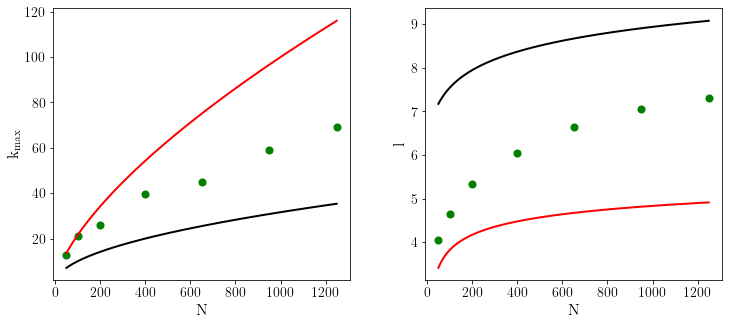

In [18]:
NL = [50,100,200,400,650,950,1250]
K=1
Nensemble=10
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.25)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel(r"$\rm N$")
ax1.set_ylabel(r'$\rm k_{\rm max}$')
ax2.set_xlabel(r"$\rm N$")
ax2.set_ylabel(r'$\rm l$')


lL = []
maxkL=[]
for N in NL:
    l = []
    maxk = []
    for i in range(Nensemble):
        G=nx.barabasi_albert_graph(N,K)
        l.append(nx.average_shortest_path_length(G))
        degree_sequence=[]
        for n in G.nodes():
            degree_sequence.append(G.degree(n))
        maxk.append(max(degree_sequence))
    lL.append(sum(l)/Nensemble)
    maxkL.append(sum(maxk)/Nensemble)

ax1.scatter(NL, maxkL,s=50, marker='o', c="green")
ax1.plot(range(NL[0],max(NL),1),np.array(Fkmax(NL[0],max(NL),K,3)), linewidth=2, linestyle='-', c="black")
ax1.plot(range(NL[0],max(NL),1),np.array(Fkmax(NL[0],max(NL),K,2.5)), linewidth=2, linestyle='-', c="red")

ax2.scatter(NL, lL,s=50, marker='o', c="green");
ax2.plot(range(NL[0],max(NL),1),np.array(Fl(NL[0],max(NL),3)), linewidth=2, linestyle='-', c="black")
ax2.plot(range(NL[0],max(NL),1),np.array(Fl(NL[0],max(NL),2.5)), linewidth=2, linestyle='-', c="red");


Die obigen Abbildungen zeigen gut den erwarteten analytischen Verlauf der beiden Größen. Die grünen Punkte stellen die Werte des Ensemblemittels der skalenfreien Netzwerke dar. Die schwarze Kurve zeigt den analytischen Verlauf für $\gamma=3$ und die rote Kurve für $\gamma=2.5$. In der rechten Abbildung wurde der Faktor 2.5 per Hand hinzugefügt und somit die folgenden analytischen Funktionen dargestellt: rote Kurve $l=2.5\,{\rm ln} ({\rm ln}( N))$, schwarze Kurve $l=2.5\,\frac{{{\rm ln} (N)}}{{{\rm ln} ({\rm ln}( N))}}$.